# Adult Income Dataset

Logistic Regression

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
ADULT_HEADERS = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', \
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', \
                 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

adultdata = pd.read_csv('../adult.data.txt', names = ADULT_HEADERS, index_col=False)

In [3]:
adultdata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adults_df = adultdata
adults_df['over50k'] = adultdata['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [5]:
adults_df[0:10]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,over50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


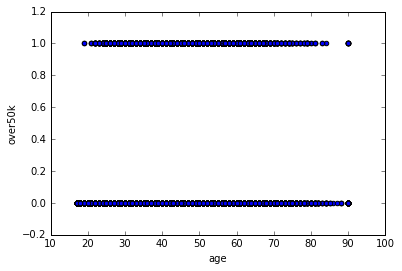

In [6]:
adults_df.plot(kind='scatter',x='age', y='over50k')

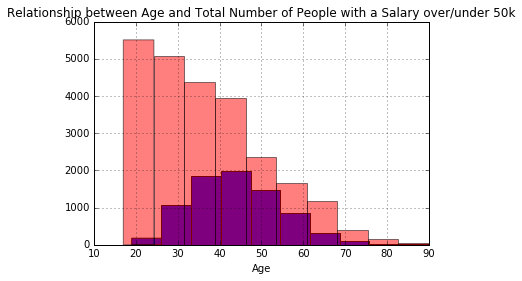

In [7]:
adults_over50k = adults_df[adults_df['over50k'] == 1]
adults_under50k = adults_df[adults_df['over50k'] == 0]

adults_df[adults_df['over50k'] == 1]['age'].hist(color='b')
adults_df[adults_df['over50k'] == 0]['age'].hist(color='r', alpha=0.5)
plt.title("Relationship between Age and Total Number of People with a Salary over/under 50k")
plt.xlabel("Age")

In [8]:
len(adults_df[adults_df['over50k'] == 1]) / len(adults_df)

0.2408095574460244

In [9]:
adults_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,over50k
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
#How many relationships have empty strings
sum(adults_df['relationship'] == '')

0

In [11]:
sum(adults_df['capital-loss'] == 0)

31042

In [12]:
adults_over50k['occupation'].value_counts()

 Exec-managerial      1968
 Prof-specialty       1859
 Sales                 983
 Craft-repair          929
 Adm-clerical          507
 Transport-moving      320
 Tech-support          283
 Machine-op-inspct     250
 Protective-serv       211
 ?                     191
 Other-service         137
 Farming-fishing       115
 Handlers-cleaners      86
 Priv-house-serv         1
 Armed-Forces            1
Name: occupation, dtype: int64

In [13]:
adults_under50k['occupation'].value_counts()

 Adm-clerical         3263
 Craft-repair         3170
 Other-service        3158
 Sales                2667
 Prof-specialty       2281
 Exec-managerial      2098
 Machine-op-inspct    1752
 ?                    1652
 Handlers-cleaners    1284
 Transport-moving     1277
 Farming-fishing       879
 Tech-support          645
 Protective-serv       438
 Priv-house-serv       148
 Armed-Forces            8
Name: occupation, dtype: int64

In [14]:
adults_df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [15]:
adults_df['occupation'][0:10]

0          Adm-clerical
1       Exec-managerial
2     Handlers-cleaners
3     Handlers-cleaners
4        Prof-specialty
5       Exec-managerial
6         Other-service
7       Exec-managerial
8        Prof-specialty
9       Exec-managerial
Name: occupation, dtype: object

In [16]:
occ_indicators = pd.get_dummies(adults_df['occupation'])
occ_indicators[0:10]

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [17]:
adults_df = adults_df.merge(occ_indicators, suffixes=('', ''),
                            left_index=True, right_index=True)

Features of only Age and Professions, let's see if we can get an accurate target of over50k.

In [18]:
FEATURES = ['age'] + list(occ_indicators.columns)
TARGET = ['over50k']

adults_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,1,0,0,0,0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,1,0,0,0,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,1,0,0,0,0


In [19]:
X = adults_df[FEATURES].values
y = adults_df[TARGET].values.ravel()

X

array([[ 39.,   0.,   1., ...,   0.,   0.,   0.],
       [ 50.,   0.,   0., ...,   0.,   0.,   0.],
       [ 38.,   0.,   0., ...,   0.,   0.,   0.],
       ..., 
       [ 58.,   0.,   1., ...,   0.,   0.,   0.],
       [ 22.,   0.,   1., ...,   0.,   0.,   0.],
       [ 52.,   0.,   0., ...,   0.,   0.,   0.]])

In [20]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [21]:
lclf = LogisticRegression(C=1.)
lclf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
pd.Series(data=lclf.coef_.ravel(), index=FEATURES)
#negative coef means it will predict 0, and positive will predict 1
#looks correct

age                   0.040857
 ?                   -1.006875
 Adm-clerical        -0.392677
 Armed-Forces        -0.062771
 Craft-repair         0.206383
 Exec-managerial      1.300077
 Farming-fishing     -0.768287
 Handlers-cleaners   -1.038578
 Machine-op-inspct   -0.491163
 Other-service       -1.644338
 Priv-house-serv     -2.318903
 Prof-specialty       1.219874
 Protective-serv      0.722969
 Sales                0.492560
 Tech-support         0.708378
 Transport-moving    -0.014821
dtype: float64

In [23]:
pd.Series(data=np.e**(lclf.coef_.ravel()), index=FEATURES)
#This shows the odds of getting >50K, so exec managerial shows almost 4 times odds of getting 50k
#Tech support, 2 times the odds, 2:1 chance
#Age is harder to interpret, but shows that the higher the age, the higher the chance

age                   1.041703
 ?                    0.365359
 Adm-clerical         0.675247
 Armed-Forces         0.939159
 Craft-repair         1.229224
 Exec-managerial      3.669579
 Farming-fishing      0.463807
 Handlers-cleaners    0.353958
 Machine-op-inspct    0.611915
 Other-service        0.193140
 Priv-house-serv      0.098381
 Prof-specialty       3.386762
 Protective-serv      2.060542
 Sales                1.636500
 Tech-support         2.030694
 Transport-moving     0.985288
dtype: float64

In [24]:
from sklearn.cross_validation import cross_val_score

cross_val_score(lclf, X, y)

array([ 0.76607702,  0.76699834,  0.77259744])

In [25]:
cross_val_score(lclf, X, y, cv=10)

array([ 0.76358612,  0.76719902,  0.76566339,  0.7730344 ,  0.76996314,
        0.76167076,  0.77211302,  0.7705774 ,  0.77457002,  0.77088452])

Pretty high accuracy score

In [26]:
gs = GridSearchCV(LogisticRegression(), {'C': [1,1000]})
gs

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'C': [1, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [27]:
gs.fit(X,y)
gs.best_params_, gs.best_score_
#Test C both 1 and 1000 and tells us that 1 is better

({'C': 1}, 0.76855747673597252)

In [28]:
adults_df['education'][0:10]

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
5       Masters
6           9th
7       HS-grad
8       Masters
9     Bachelors
Name: education, dtype: object

In [29]:
edu = pd.get_dummies(adults_df['education'])
edu[0:10]

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
adults_df = adults_df.merge(edu, suffixes=('', ''),
                            left_index=True, right_index=True)

Now let's try with Age and Education as our features.

In [31]:
FEATURES2 = ['age'] + list(edu.columns)
TARGET2 = ['over50k']

In [32]:
FEATURES2

['age',
 ' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college']

In [33]:
X = adults_df[FEATURES2].values
y = adults_df[TARGET2].values.ravel()

In [34]:
print(X)
print(y)

[[ 39.   0.   0. ...,   0.   0.   0.]
 [ 50.   0.   0. ...,   0.   0.   0.]
 [ 38.   0.   0. ...,   0.   0.   0.]
 ..., 
 [ 58.   0.   0. ...,   0.   0.   0.]
 [ 22.   0.   0. ...,   0.   0.   0.]
 [ 52.   0.   0. ...,   0.   0.   0.]]
[0 0 0 ..., 0 0 1]


In [35]:
lclf2 = LogisticRegression(C=1.)
lclf2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
pd.Series(data=lclf2.coef_.ravel(), index=FEATURES2)

age              0.042485
 10th           -1.216419
 11th           -1.273251
 12th           -0.782416
 1st-4th        -1.839654
 5th-6th        -1.645063
 7th-8th        -1.717585
 9th            -1.556503
 Assoc-acdm      0.466741
 Assoc-voc       0.484799
 Bachelors       1.205436
 Doctorate       2.269646
 HS-grad        -0.211260
 Masters         1.584543
 Preschool      -1.517223
 Prof-school     2.378533
 Some-college    0.151552
dtype: float64

In [37]:
pd.Series(data=np.e**(lclf2.coef_.ravel()), index=FEATURES2)

age               1.043400
 10th             0.296289
 11th             0.279920
 12th             0.457300
 1st-4th          0.158872
 5th-6th          0.193000
 7th-8th          0.179499
 9th              0.210872
 Assoc-acdm       1.594789
 Assoc-voc        1.623848
 Bachelors        3.338213
 Doctorate        9.675978
 HS-grad          0.809563
 Masters          4.877064
 Preschool        0.219320
 Prof-school     10.789065
 Some-college     1.163639
dtype: float64

In [38]:
cross_val_score(lclf2, X, y)

array([ 0.78063387,  0.7810024 ,  0.78245646])

In [39]:
cross_val_score(lclf2, X, y, cv=10)

array([ 0.77770955,  0.77856265,  0.79023342,  0.78101966,  0.78409091,
        0.77979115,  0.78071253,  0.78439803,  0.78286241,  0.78071253])

Higher accuracy score

In [40]:
gs2 = GridSearchCV(LogisticRegression(), {'C': [1,1000]})
gs2

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'C': [1, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [41]:
gs2.fit(X,y)
gs2.best_params_, gs2.best_score_

({'C': 1}, 0.78136420871594858)

Now let's try with all three features: Age, Education and Profession

In [42]:
FEATURES3 = ['age'] + list(edu.columns) + list(occ_indicators.columns)
TARGET3 = ['over50k']

In [43]:
FEATURES3

['age',
 ' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college',
 ' ?',
 ' Adm-clerical',
 ' Armed-Forces',
 ' Craft-repair',
 ' Exec-managerial',
 ' Farming-fishing',
 ' Handlers-cleaners',
 ' Machine-op-inspct',
 ' Other-service',
 ' Priv-house-serv',
 ' Prof-specialty',
 ' Protective-serv',
 ' Sales',
 ' Tech-support',
 ' Transport-moving']

In [44]:
TARGET3

['over50k']

In [45]:
X = adults_df[FEATURES3].values
y = adults_df[TARGET3].values.ravel()

In [46]:
print(X)
print(y)

[[ 39.   0.   0. ...,   0.   0.   0.]
 [ 50.   0.   0. ...,   0.   0.   0.]
 [ 38.   0.   0. ...,   0.   0.   0.]
 ..., 
 [ 58.   0.   0. ...,   0.   0.   0.]
 [ 22.   0.   0. ...,   0.   0.   0.]
 [ 52.   0.   0. ...,   0.   0.   0.]]
[0 0 0 ..., 0 0 1]


In [47]:
lclf3 = LogisticRegression(C=1.)
lclf3.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
pd.Series(data=lclf3.coef_.ravel(), index=FEATURES3)

age                   0.043114
 10th                -1.116829
 11th                -1.138202
 12th                -0.680776
 1st-4th             -1.602914
 5th-6th             -1.333869
 7th-8th             -1.533785
 9th                 -1.333270
 Assoc-acdm           0.322973
 Assoc-voc            0.350141
 Bachelors            0.904070
 Doctorate            1.983530
 HS-grad             -0.209690
 Masters              1.202165
 Preschool           -1.222567
 Prof-school          2.098915
 Some-college         0.067076
 ?                   -1.040642
 Adm-clerical        -0.483146
 Armed-Forces        -0.119584
 Craft-repair         0.392037
 Exec-managerial      0.883748
 Farming-fishing     -0.575503
 Handlers-cleaners   -0.726186
 Machine-op-inspct   -0.159964
 Other-service       -1.433703
 Priv-house-serv     -1.941924
 Prof-specialty       0.297220
 Protective-serv      0.649546
 Sales                0.329552
 Tech-support         0.410868
 Transport-moving     0.274649
dtype: f

In [49]:
pd.Series(data=np.e**(lclf3.coef_.ravel()), index=FEATURES3)

age                   1.044057
 10th                 0.327316
 11th                 0.320394
 12th                 0.506224
 1st-4th              0.201309
 5th-6th              0.263456
 7th-8th              0.215718
 9th                  0.263614
 Assoc-acdm           1.381228
 Assoc-voc            1.419268
 Bachelors            2.469635
 Doctorate            7.268353
 HS-grad              0.810835
 Masters              3.327311
 Preschool            0.294473
 Prof-school          8.157317
 Some-college         1.069377
 ?                    0.353228
 Adm-clerical         0.616840
 Armed-Forces         0.887290
 Craft-repair         1.479993
 Exec-managerial      2.419953
 Farming-fishing      0.562422
 Handlers-cleaners    0.483750
 Machine-op-inspct    0.852174
 Other-service        0.238424
 Priv-house-serv      0.143428
 Prof-specialty       1.346111
 Protective-serv      1.914672
 Sales                1.390345
 Tech-support         1.508127
 Transport-moving     1.316068
dtype: f

In [50]:
cross_val_score(lclf3, X, y)

array([ 0.79104478,  0.79086051,  0.7936976 ])

In [51]:
cross_val_score(lclf3, X, y, cv=10)

array([ 0.78784157,  0.78685504,  0.79883292,  0.79269042,  0.80067568,
        0.78439803,  0.78439803,  0.79637592,  0.79514742,  0.78869779])

The most accurate so far

In [52]:
gs3 = GridSearchCV(LogisticRegression(), {'C': [1,1000]})
gs3

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'C': [1, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [53]:
gs3.fit(X,y)
gs3.best_params_, gs3.best_score_

({'C': 1000}, 0.79192899480974177)

In [54]:
lclf4 = LogisticRegression(C=1000.)
lclf4.fit(X,y)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [55]:
pd.Series(data=lclf4.coef_.ravel(), index=FEATURES3)

age                   0.043436
 10th                -1.087871
 11th                -1.104763
 12th                -0.676823
 1st-4th             -1.708370
 5th-6th             -1.359035
 7th-8th             -1.558217
 9th                 -1.364861
 Assoc-acdm           0.368233
 Assoc-voc            0.390530
 Bachelors            0.948547
 Doctorate            2.046553
 HS-grad             -0.170560
 Masters              1.249841
 Preschool           -1.560051
 Prof-school          2.162489
 Some-college         0.108260
 ?                   -1.025617
 Adm-clerical        -0.466727
 Armed-Forces        -0.169762
 Craft-repair         0.414795
 Exec-managerial      0.901020
 Farming-fishing     -0.566941
 Handlers-cleaners   -0.714410
 Machine-op-inspct   -0.134325
 Other-service       -1.411408
 Priv-house-serv     -2.203576
 Prof-specialty       0.309395
 Protective-serv      0.671417
 Sales                0.348159
 Tech-support         0.433666
 Transport-moving     0.298215
dtype: f

In [56]:
pd.Series(data=np.e**(lclf4.coef_.ravel()), index=FEATURES3)

age                   1.044394
 10th                 0.336933
 11th                 0.331289
 12th                 0.508229
 1st-4th              0.181161
 5th-6th              0.256908
 7th-8th              0.210511
 9th                  0.255416
 Assoc-acdm           1.445178
 Assoc-voc            1.477764
 Bachelors            2.581956
 Doctorate            7.741175
 HS-grad              0.843193
 Masters              3.489788
 Preschool            0.210125
 Prof-school          8.692746
 Some-college         1.114337
 ?                    0.358575
 Adm-clerical         0.627051
 Armed-Forces         0.843865
 Craft-repair         1.514060
 Exec-managerial      2.462113
 Farming-fishing      0.567258
 Handlers-cleaners    0.489481
 Machine-op-inspct    0.874306
 Other-service        0.243800
 Priv-house-serv      0.110408
 Prof-specialty       1.362601
 Protective-serv      1.957009
 Sales                1.416458
 Tech-support         1.542904
 Transport-moving     1.347451
dtype: f

In [57]:
cross_val_score(lclf4, X, y)

array([ 0.79122904,  0.79095264,  0.79360545])

In [58]:
cross_val_score(lclf4, X, y, cv=10)

array([ 0.7881486 ,  0.78685504,  0.79821867,  0.79238329,  0.8009828 ,
        0.78439803,  0.78439803,  0.7960688 ,  0.79545455,  0.78869779])

In [59]:
gs4 = GridSearchCV(LogisticRegression(), {'C': [1,1000]})
gs4

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'C': [1, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [60]:
gs4.fit(X,y)
gs4.best_params_, gs4.best_score_

({'C': 1000}, 0.79192899480974177)